# Задание 1
1. Проведите предобработку текстов из файлов positive.csv, negative.csv. Нужно выполнить те же действия, что в предыдущем дне, но не удалять редко встречающиеся слова. Регулировать использование редких слов будем на уровне модели word2vec. Не забудьте удалить стоп-слова.
2. Будем исследовать то, как влияют на качество преобразования *размер целевого векторного пространства* и *использование редких слов*. Создайте несколько моделей word2vec, перебрав параметры:
  - размер результирующего пространства: [10, 300, 500] при фиксированной минимальной встречаемости слов = 10
  - минимальная встречаемость слов: [1, 10, 100] при фиксированном размере результирующего векторного пространства = 300

  Обучите их на всем пространстве текстов.

3. Отберите 5 случайных слов из выборки позитивных публикаций и 5 случайных слови из выборки негативных публикаций.
4. Для каждой из обученных моделей найдите по 15 синонимов и по 15 антонимов для каждого из слов из п.3. Опишите:
  - как влияет размер результирующего пространства на точность определения синонимов/антонимов моделью? почему?
  - как влияет минимальная встречаемость слов на точность определения синонимов/антонимов моделью? почему?
5. Постройте графики распределения слов в двумерном пространстве. Опишите, как влияют исследуемые параметры на кучность и расположение точек на графике. Почему?
6. Возьмите любой твит, обучите модель word2vec с параметрами по умолчанию и попробуйте предсказать продолжение твита. Также попробуйте предсказать продолжение случайной фразы. Сравните результаты, полученные после обучения моделей с разным количеством эпох обучения.

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
Names = ['id','date','name','text','positive','rep','rtv','fav','total_count', 'fol','friends','list_count']
df = pd.read_csv('../datasets/positive.csv',names=Names,sep=';')
df2 = pd.read_csv('../datasets/negative.csv',names=Names,sep=';')
df3 = pd.concat([df,df2],ignore_index=True)
preprocessed_df = df3[["text", "positive"]]
preprocessed_df.text = preprocessed_df.text.str.lower()
preprocessed_df.text = preprocessed_df.text.str.replace(r"[^А-Яа-я]"," ")
preprocessed_df.text = list(map(word_tokenize, preprocessed_df.text))
russian_stopwords = stopwords.words("russian")
russian_stopwords.sort()
russian_stopwords = set(russian_stopwords)
def delete_stopword(words):
    global russian_stopwords
    new_s = [word for word in words if word not in russian_stopwords]
    return new_s
preprocessed_df.text = list(map(delete_stopword, preprocessed_df.text))
preprocessed_df

,text,positive
0,"[школота, поверь, самое, общество, профилирующ...",1
1,"[таки, немного, похож, мальчик, равно]",1
2,"[идиотка, испугалась]",1
3,"[углу, сидит, погибает, голода, ещ, порции, вз...",1
4,"[значит, страшилка, блин, посмотрев, части, со...",1
...,...,...
226829,"[каждый, хочет, исправлять]",-1
226830,"[скучаю, вправляет, мозги, равно, скучаю]",-1
226831,"[школу, говно, это, идти]",-1
226832,"[тауриэль, грусти, обнял]",-1


In [22]:
from gensim.models import Word2Vec
pos = ["значит", "похож", "блин", "сидит", "части"]
neg = ["говно", "везет", "работу", "скучаю", "грусти"]
w2v = Word2Vec(vector_size=10, min_count=10)  # создадим экземпляр модели word2vec. Здесь size - размер векторного пространства,
                                       # min_count - минимальное количество появлений слова в наборе данных, при котором
                                       # будем учитывать это слово в модели
w2v.build_vocab(preprocessed_df.text)  # обучим модель на нашем наборе текстов
for i in range(0,len(pos)):
    print("-------------------""vector_size=10, min_count=10 positive =", pos[i],"-----------------------")
    print(w2v.wv.most_similar(positive=pos[i],topn=15))
    print("-------------------""vector_size=10, min_count=10 negative=",pos[i],"-----------------------")
    print(w2v.wv.most_similar(negative=pos[i],topn=15))
    print("-------------------""vector_size=10, min_count=10 positive =", neg[i],"-----------------------")
    print(w2v.wv.most_similar(positive=neg[i],topn=15))
    print("-------------------""vector_size=10, min_count=10 negative=",neg[i],"-----------------------")
    print(w2v.wv.most_similar(negative=neg[i],topn=15))
w2v2 = Word2Vec(vector_size=300, min_count=10)
w2v2.build_vocab(preprocessed_df.text)
for i in range(0,len(pos)):
    print("-------------------""vector_size=300, min_count=10 positive =", pos[i],"-----------------------")
    print(w2v2.wv.most_similar(positive=pos[i],topn=15))
    print("-------------------""vector_size=300, min_count=10 negative=",pos[i],"-----------------------")
    print(w2v2.wv.most_similar(negative=pos[i],topn=15))
    print("-------------------""vector_size=300, min_count=10 positive =", neg[i],"-----------------------")
    print(w2v2.wv.most_similar(positive=neg[i],topn=15))
    print("-------------------""vector_size=300, min_count=10 negative=",neg[i],"-----------------------")
    print(w2v2.wv.most_similar(negative=neg[i],topn=15))
w2v21 = Word2Vec(vector_size=300, min_count=1)
w2v21.build_vocab(preprocessed_df.text)
for i in range(0,len(pos)):
    print("-------------------""vector_size=300, min_count=1 positive =", pos[i],"-----------------------")
    print(w2v21.wv.most_similar(positive=pos[i],topn=15))
    print("-------------------""vector_size=300, min_count=1 negative=",pos[i],"-----------------------")
    print(w2v21.wv.most_similar(negative=pos[i],topn=15))
    print("-------------------""vector_size=300, min_count=1 positive =", neg[i],"-----------------------")
    print(w2v21.wv.most_similar(positive=neg[i],topn=15))
    print("-------------------""vector_size=300, min_count=1 negative=",neg[i],"-----------------------")
    print(w2v21.wv.most_similar(negative=neg[i],topn=15))
w2v23 = Word2Vec(vector_size=300, min_count=100)
w2v23.build_vocab(preprocessed_df.text)
for i in range(0,len(pos)):
    print("-------------------""vector_size=300, min_count=100 positive =", pos[i],"-----------------------")
    print(w2v23.wv.most_similar(positive=pos[i],topn=15))
    print("-------------------""vector_size=300, min_count=100 negative=",pos[i],"-----------------------")
    print(w2v23.wv.most_similar(negative=pos[i],topn=15))
    print("-------------------""vector_size=300, min_count=100 positive =", neg[i],"-----------------------")
    print(w2v23.wv.most_similar(positive=neg[i],topn=15))
    print("-------------------""vector_size=300, min_count=100 negative=",neg[i],"-----------------------")
    print(w2v23.wv.most_similar(negative=neg[i],topn=15))
w2v3 = Word2Vec(vector_size=500, min_count=10)
w2v3.build_vocab(preprocessed_df.text)
for i in range(0,len(pos)):
    print("-------------------""vector_size=500, min_count=10 positive =", pos[i],"-----------------------")
    print(w2v3.wv.most_similar(positive=pos[i],topn=15))
    print("-------------------""vector_size=500, min_count=10 negative=",pos[i],"-----------------------")
    print(w2v3.wv.most_similar(negative=pos[i],topn=15))
    print("-------------------""vector_size=500, min_count=10 positive =", neg[i],"-----------------------")
    print(w2v3.wv.most_similar(positive=neg[i],topn=15))
    print("-------------------""vector_size=500, min_count=10 negative=",neg[i],"-----------------------")
    print(w2v3.wv.most_similar(negative=neg[i],topn=15)) 

-------------------vector_size=10, min_count=10 positive = значит -----------------------
[('поищи', 0.9263765811920166), ('парты', 0.9248397350311279), ('забери', 0.9173926711082458), ('танцую', 0.896745502948761), ('було', 0.8963225483894348), ('повеселил', 0.8911904692649841), ('майку', 0.8827815055847168), ('наушниками', 0.875410258769989), ('мариной', 0.8697760701179504), ('ввели', 0.859348475933075), ('гирляндой', 0.8555958867073059), ('родственников', 0.8480510115623474), ('кубань', 0.8309876918792725), ('справлять', 0.8243626356124878), ('окружают', 0.8215435743331909)]
-------------------vector_size=10, min_count=10 negative= значит -----------------------
[('прочей', 0.9486730694770813), ('олимпиада', 0.8981921672821045), ('обязан', 0.8737720847129822), ('культуры', 0.8721632957458496), ('рану', 0.863464891910553), ('джерард', 0.856891930103302), ('мерзкий', 0.8539071083068848), ('ностальгии', 0.84457927942276), ('последний', 0.8426343202590942), ('успеть', 0.842049777507782)

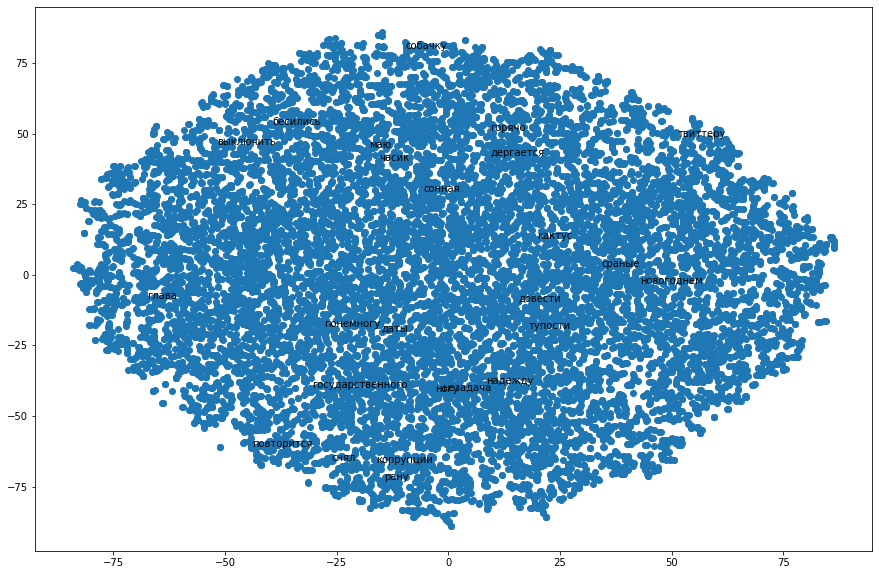

In [24]:
from sklearn.manifold import TSNE
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (15, 10)

def reduce_dimensions(w2v_model):
    """Фукнция принимает модель word2vec и возвращает массив абсцисс,
    массив ординат и массив слов после снижения размерности"""
    tsne = TSNE(n_components=2, random_state=256)  # создадим экземпляр модели TSNE
    vectors = np.asarray(w2v_model.wv.vectors)     # возьмем из модели 300-мерный массив слов-векторов
    labels = np.asarray(w2v_model.wv.index_to_key)   # отдельно сохраним соответствие номера вектора и самого слова
    vectors = tsne.fit_transform(vectors)          # проведем преобразование каждого вектора в 2-мерный

    x = [v[0] for v in vectors]                    # запишем отдельно массив абсцисс и массив ординат
    y = [v[1] for v in vectors]
    return x, y, labels


def plot_w2v(w2v_model):
    """Функция строит график распределения слов по векторному пространству
    размерности 2 исходя из обученной модели word2vec"""
    x, y, labels = reduce_dimensions(w2v_model)                      # получим значения по осям и названия точек (исходные слова)
    plt.scatter(x, y)                                                # строим график с точками
    words_to_show_indices = np.random.randint(len(labels), size=25)  # выберем 25 случайных слов, которые отобразим на графике
    for i in words_to_show_indices:
        plt.annotate(labels[i], (x[i], y[i]))
plot_w2v(w2v)

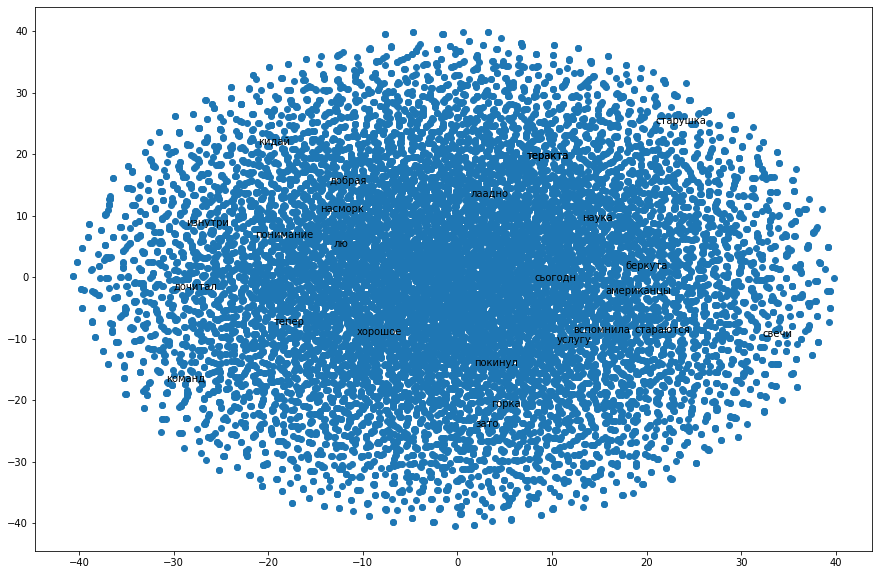

In [25]:
plot_w2v(w2v2)

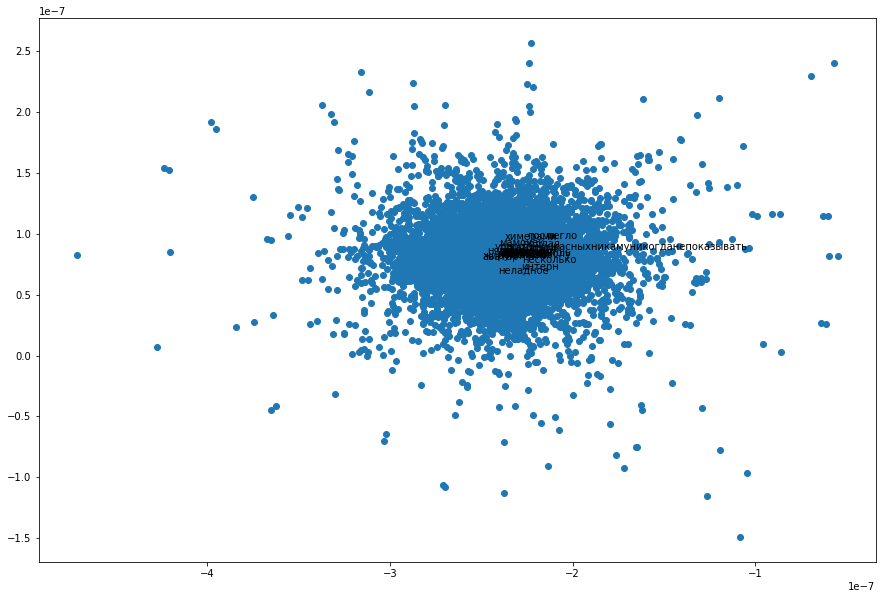

In [26]:
plot_w2v(w2v21)

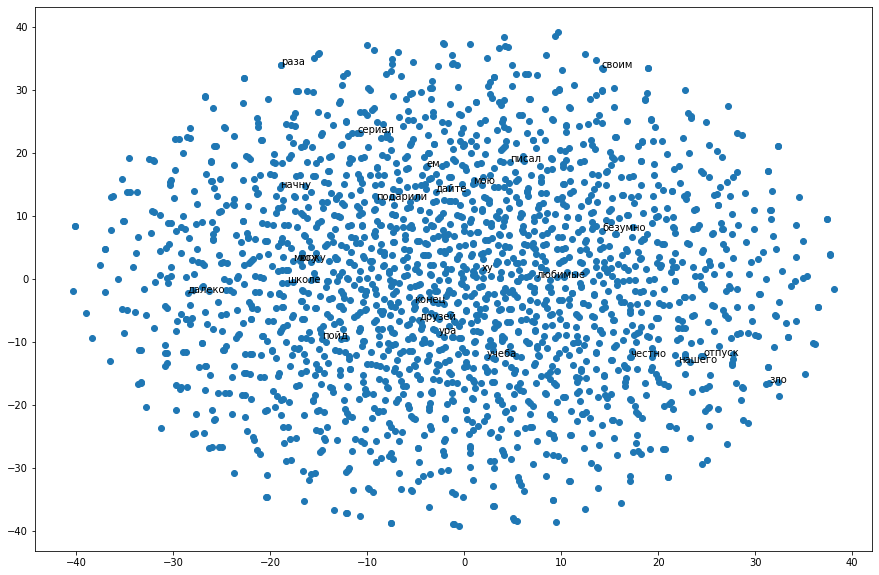

In [38]:
plot_w2v(w2v23)

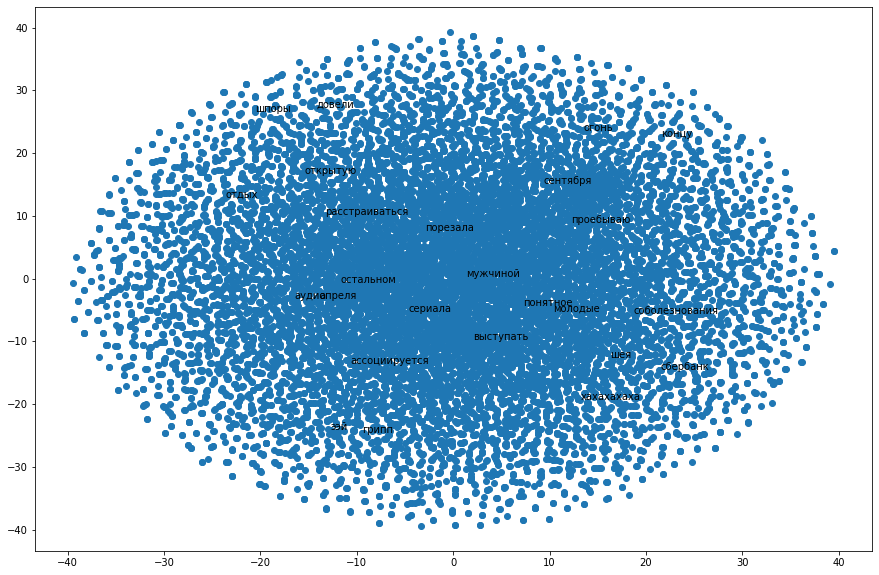

In [39]:
plot_w2v(w2v3)

In [53]:
print(preprocessed_df.text[0])
w1 = Word2Vec()
w1.build_vocab(preprocessed_df.text)
w1.train(preprocessed_df.text, total_examples=preprocessed_df.shape[0], epochs=100)
w1.predict_output_word(["самое", "общество", "профилирующий"])

['школота', 'поверь', 'самое', 'общество', 'профилирующий', 'предмет', 'типа']


[('обидное', 0.42136523),
 ('страшное', 0.1892783),
 ('ужасное', 0.09908176),
 ('лучшее', 0.06952198),
 ('сложное', 0.05673931),
 ('смешное', 0.02921308),
 ('главное', 0.025924662),
 ('приятное', 0.019500848),
 ('худшее', 0.015548217),
 ('время', 0.013774807)]

In [54]:
w1.train(preprocessed_df.text, total_examples=preprocessed_df.shape[0], epochs=500)
w1.predict_output_word(["самое", "общество", "профилирующий"])

[('сложное', 0.26915404),
 ('страшное', 0.17710164),
 ('главное', 0.12554868),
 ('смешное', 0.11032995),
 ('ужасное', 0.06783353),
 ('обидное', 0.0523486),
 ('время', 0.04450127),
 ('лучшее', 0.029488662),
 ('приятное', 0.004378528),
 ('худшее', 0.003746654)]

In [45]:
w1.train(preprocessed_df.text, total_examples=preprocessed_df.shape[0], epochs=1000)
w1.predict_output_word(["самое", "общество", "профилирующий"])

[('страшное', 0.28448784),
 ('ужасное', 0.1808582),
 ('обидное', 0.11441774),
 ('время', 0.08540619),
 ('смешное', 0.07603555),
 ('сложное', 0.06541622),
 ('главное', 0.043691535),
 ('лучшее', 0.026919883),
 ('важное', 0.021035545),
 ('приятное', 0.015268958)]

In [55]:
w1.train(preprocessed_df.text, total_examples=preprocessed_df.shape[0], epochs=10)
w1.predict_output_word(["Привет", "меня", "зовут"])

[('женя', 0.5707085),
 ('бабу', 0.11937287),
 ('никого', 0.0459236),
 ('познакомились', 0.04075386),
 ('зовут', 0.027370818),
 ('сталкер', 0.018605826),
 ('лего', 0.013918188),
 ('джони', 0.012653439),
 ('чему', 0.01217068),
 ('слушай', 0.010702498)]

In [56]:
w1.train(preprocessed_df.text, total_examples=preprocessed_df.shape[0], epochs=100)
w1.predict_output_word(["Привет", "меня", "зовут"])

[('женя', 0.055705134),
 ('взглядом', 0.04315357),
 ('сталкер', 0.03457961),
 ('никого', 0.03362469),
 ('бабу', 0.02454414),
 ('слушай', 0.023541352),
 ('познакомились', 0.022368709),
 ('маша', 0.016398644),
 ('ееее', 0.014428075),
 ('лего', 0.013953105)]

# Задание 2

В этом задании от вас требуется провести классификацию текстов с использованием градиентного бустинга. Постройте такую модель, которая даст наилучший результат по метрике precision к классу 0, подобрав гиперпараметры:
- минимальная встречаемость слова в текстах в doc2vec
- максимальная глубина деревеьев в бустинге
- количество деревьев в бустинге

Дайте ответ на вопрос: лучше использовать более глубокие или более мелкие деревья в модели градиентного бустинга?

In [57]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tweets = [TaggedDocument(doc, [i]) for i, doc in enumerate(preprocessed_df.text)]
d2v = Doc2Vec(tweets, min_count=1)                   
d2v.train(tweets, total_examples=len(tweets), epochs=20)
from sklearn.model_selection import train_test_split
X_train_texts, X_test_texts, y_train, y_test = train_test_split(preprocessed_df.text, preprocessed_df.positive, test_size=0.2, random_state=21)
def transform_text_array_to_vector_dataframe(text_array):
    """Функция, которая преобразует одномерный колонку списков слов из текстов
    в датафрейм со значениями векторов этих текстов"""
    columns = [str(n) for n in range(d2v.vector_size)]               # задаем список названий колонок - просто порядковые номера
    vectors_ndarray = text_array.apply(d2v.infer_vector).to_list()  # прогоняем каждый текст через модель doc2vec и формируем многомерный массив чисел
    return pd.DataFrame(vectors_ndarray, columns=columns)            # оборачиваем его в датафрейм для удобства


X_train = transform_text_array_to_vector_dataframe(X_train_texts)
X_test = transform_text_array_to_vector_dataframe(X_test_texts)

from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb = XGBClassifier(max_depth=10, n_estimators=50)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_pred, y_test))

[00:29:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

          -1       0.61      0.61      0.61     22479
           1       0.62      0.62      0.62     22888

    accuracy                           0.61     45367
   macro avg       0.61      0.61      0.61     45367
weighted avg       0.61      0.61      0.61     45367



In [61]:
xgb2 = XGBClassifier(max_depth=1000, n_estimators=100)
xgb2.fit(X_train, y_train)
y_pred2 = xgb2.predict(X_test)
print(classification_report(y_pred2, y_test))

[01:04:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

          -1       0.61      0.63      0.62     21814
           1       0.64      0.63      0.64     23553

    accuracy                           0.63     45367
   macro avg       0.63      0.63      0.63     45367
weighted avg       0.63      0.63      0.63     45367



In [62]:
xgb3 = XGBClassifier(max_depth=10000, n_estimators=1000)
xgb3.fit(X_train, y_train)
y_pred3 = xgb3.predict(X_test)
print(classification_report(y_pred3, y_test))

[01:18:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

          -1       0.62      0.64      0.63     21677
           1       0.66      0.64      0.65     23690

    accuracy                           0.64     45367
   macro avg       0.64      0.64      0.64     45367
weighted avg       0.64      0.64      0.64     45367



In [71]:
xgb4 = XGBClassifier(max_depth=1, n_estimators=500)
xgb4.fit(X_train, y_train)
y_pred4 = xgb4.predict(X_test)
print(classification_report(y_pred4, y_test))

[02:30:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

          -1       0.61      0.60      0.61     22745
           1       0.61      0.62      0.61     22622

    accuracy                           0.61     45367
   macro avg       0.61      0.61      0.61     45367
weighted avg       0.61      0.61      0.61     45367



In [72]:
xgb5 = XGBClassifier(max_depth=1, n_estimators=5000)
xgb5.fit(X_train, y_train)
y_pred5 = xgb5.predict(X_test)
print(classification_report(y_pred5, y_test))

[02:34:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

          -1       0.62      0.61      0.62     22876
           1       0.61      0.62      0.62     22491

    accuracy                           0.62     45367
   macro avg       0.62      0.62      0.62     45367
weighted avg       0.62      0.62      0.62     45367

